# Forecast Exchange Rates

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import tools
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
nn = pd.read_csv('/content/DEXINUS (1).csv',parse_dates=["observation_date"])
nn.head()

,observation_date,DEXINUS
0,1973-02-01,8.02
1,1973-03-01,8.02
2,1973-04-01,8.00
3,1973-05-01,8.01
4,1973-08-01,8.00


In [ ]:
#Copy Data
df = nn.copy()
df.head()

,observation_date,DEXINUS
0,1973-02-01,8.02
1,1973-03-01,8.02
2,1973-04-01,8.00
3,1973-05-01,8.01
4,1973-08-01,8.00


In [ ]:
df.shape

(12649, 2)

In [ ]:
#renaming the Date and Dexinus
data = df[['observation_date', 'DEXINUS']]
data.columns = ['Date', 'Dexinus']

In [ ]:
data.head()

,Date,Dexinus
0,1973-02-01,8.02
1,1973-03-01,8.02
2,1973-04-01,8.00
3,1973-05-01,8.01
4,1973-08-01,8.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     12649 non-null  datetime64[ns]
 1   Dexinus  12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [ ]:
data['Dexinus'] = pd.to_numeric(data.Dexinus)

Sorting Date in Ascending order

In [ ]:
data = data.sort_values('Date', ascending=True)

In [ ]:
data.Dexinus.describe()

count    12155.000000
mean        34.206133
std         21.089190
min          7.190000
25%         12.075000
50%         35.890000
75%         47.650000
max         76.950000
Name: Dexinus, dtype: float64

In [ ]:
data.isnull().sum()

Date         0
Dexinus    494
dtype: int64

In [ ]:
#Forward Filling
data.fillna(method='ffill', inplace=True)

In [ ]:
data.isnull().sum()

Date       0
Dexinus    0
dtype: int64

In [ ]:
#transformation of values to float
data['Dexinus'] = pd.to_numeric(data['Dexinus'], downcast="float")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 22 to 12616
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     12649 non-null  datetime64[ns]
 1   Dexinus  12649 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 247.1 KB


In [ ]:
data.duplicated().sum()

0

### Final Data

In [ ]:
final_data = data.copy()

In [ ]:
final_data.head()

,Date,Dexinus
22,1973-01-02,8.00
42,1973-01-03,7.55
85,1973-01-05,7.54
108,1973-01-06,7.25
151,1973-01-08,7.49


In [ ]:
data1 = data.copy()

In [ ]:
data1.head()

,Date,Dexinus
22,1973-01-02,8.00
42,1973-01-03,7.55
85,1973-01-05,7.54
108,1973-01-06,7.25
151,1973-01-08,7.49


In [ ]:
final_data1 = data1.copy()

### Segregating Years, Months, Day

In [ ]:
df1 = final_data.copy()

In [ ]:
#if date is not set to index then use 
#Year
df1['Year']= [i.year for i in df1['Date']]
#Month
df1['Month']= [i.month for i in df1['Date']]
#Day
df1['Day']= [i.day for i in df1['Date']]

In [ ]:
df1.head()

,Date,Dexinus,Year,Month,Day
22,1973-01-02,8.00,1973,1,2
42,1973-01-03,7.55,1973,1,3
85,1973-01-05,7.54,1973,1,5
108,1973-01-06,7.25,1973,1,6
151,1973-01-08,7.49,1973,1,8


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 22 to 12616
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     12649 non-null  datetime64[ns]
 1   Dexinus  12649 non-null  float32       
 2   Year     12649 non-null  int64         
 3   Month    12649 non-null  int64         
 4   Day      12649 non-null  int64         
dtypes: datetime64[ns](1), float32(1), int64(3)
memory usage: 543.5 KB


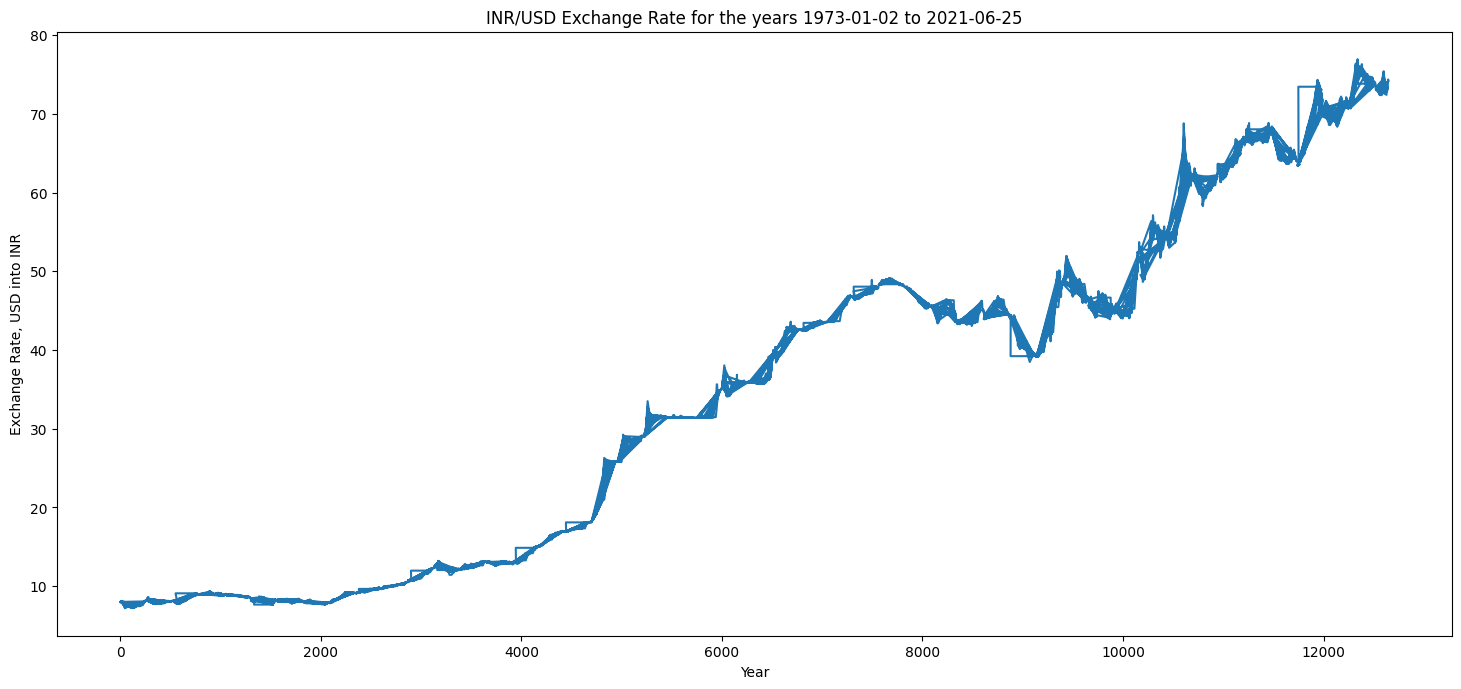

In [ ]:
#Line Plot
plt.figure(figsize =(18,8),dpi=100)
df1.Dexinus.plot()
plt.ylabel('Exchange Rate, USD into INR')
plt.xlabel('Year')
plt.title('INR/USD Exchange Rate for the years 1973-01-02 to 2021-06-25')
plt.show()

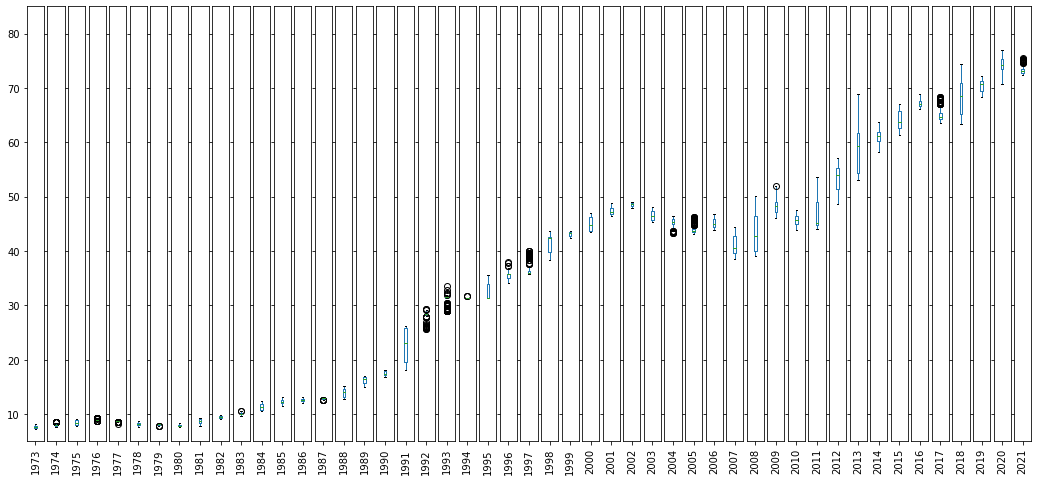

In [ ]:
### Box Plot
box1 = df1.groupby('Year')

years = list(np.unique(df1.Year))

fig, ax = plt.subplots(1, len(years), figsize=(18, 8), sharey=True)
for i, year in enumerate(years):
    X = box1.get_group(year)
    # subplots=True,layout=(1,len(A)),figsize=(18,8),use_index = True,
    X.plot(y='Dexinus',
           kind='box',
           ax=ax[i],
           label=year,
           rot=90,
           ylim=(5, 85),
           sharey=True)
    plt.tight_layout
#plt.title('box plot');
plt.show()

In [ ]:
## LSTM
df2 = final_data.copy()
df2 = df2.set_index('Date')

In [ ]:
df2.head()

,Dexinus
Date,
1973-01-02,8.00
1973-01-03,7.55
1973-01-05,7.54
1973-01-06,7.25
1973-01-08,7.49


In [ ]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df3 = scaler.fit_transform(df2)

In [ ]:
df3

array([[0.01161124],
       [0.00516056],
       [0.0050172 ],
       ...,
       [0.9392202 ],
       [0.9724771 ],
       [0.9509748 ]], dtype=float32)

In [ ]:
#Splitting Data
#Train and test sets
split_point_lstm = round(len(df3)*(3/4))
df3_train = df3[:split_point_lstm]
lstm_len_train = len(df3_train)
df3_test = df3[split_point_lstm:]
lstm_len_test = len(df3_test)

In [ ]:
print(df3_train.shape)
print(df3_test.shape)

(9487, 1)
(3162, 1)


In [ ]:
## Transformation
def get_data(data3_lstm, look_back):
  datax, datay = [],[]
  for i in range(len(data3_lstm)-look_back-1):
    datax.append(data3_lstm[i:(i+look_back),0])
    datay.append(data3_lstm[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [ ]:
look_back = 1

x_train_lstm , y_train_lstm = get_data(df3_train, look_back)
print(x_train_lstm.shape)
print(y_train_lstm.shape)

(9485, 1)
(9485,)


In [ ]:
x_test_lstm , y_test_lstm = get_data(df3_test,look_back)
print(x_test_lstm.shape)
print(y_test_lstm.shape)

(3160, 1)
(3160,)


In [ ]:
#Processing train and test sets for LSTM model
x_train_lstm = x_train_lstm.reshape(x_train_lstm.shape[0],x_train_lstm.shape[1], 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0],x_test_lstm.shape[1], 1)

In [ ]:
print(x_train_lstm.shape)
print(x_test_lstm.shape)

(9485, 1, 1)
(3160, 1, 1)


In [ ]:
## Model
#Define the LSTM model
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

In [ ]:
n_features_lstm=x_train_lstm.shape[1]
model_lstm=Sequential()
model_lstm.add(LSTM(100,activation='relu',input_shape=(1,1)))
model_lstm.add(Dense(n_features_lstm))

In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Compilation
model_lstm.compile(optimizer='adam', loss = 'mse')

In [ ]:
#Training
model_lstm.fit(x_train_lstm,y_train_lstm, epochs = 5, batch_size=1)

Epoch 1/5
9485/9485 [==============================] - 17s 2ms/step - loss: 0.0017
Epoch 2/5
9485/9485 [==============================] - 15s 2ms/step - loss: 1.3206e-04
Epoch 3/5
9485/9485 [==============================] - 16s 2ms/step - loss: 1.2696e-04
Epoch 4/5
9485/9485 [==============================] - 16s 2ms/step - loss: 1.2836e-04
Epoch 5/5
9485/9485 [==============================] - 16s 2ms/step - loss: 1.2403e-04


In [ ]:
#Prediction using the trained model
scaler.scale_

array([0.01433486], dtype=float32)

In [ ]:
y_pred_lstm = model_lstm.predict(x_test_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
print(y_pred_lstm[:10])

[[49.535297]
 [49.603714]
 [49.33978 ]
 [47.57519 ]
 [47.643906]
 [47.30011 ]
 [47.30011 ]
 [46.95528 ]
 [46.95528 ]
 [47.692986]]


In [ ]:
#Processing test shape
y_test_lstm = np.array(y_test_lstm).reshape(-1,1)
y_test_lstm = scaler.inverse_transform(y_test_lstm)
print(y_test_lstm[:10])

[[49.65    ]
 [49.380005]
 [47.579998]
 [47.65    ]
 [47.299995]
 [47.299995]
 [46.949997]
 [46.949997]
 [47.699997]
 [47.61    ]]


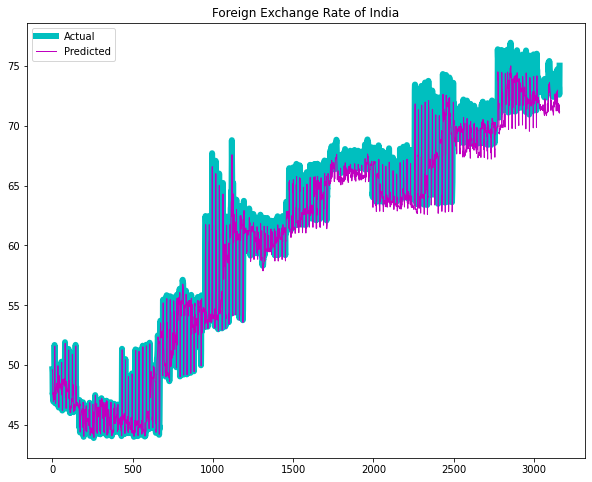

In [ ]:
#Visualizing the results
plt.figure(figsize=(10,8))
plt.title('Foreign Exchange Rate of India')
plt.plot(y_test_lstm , label = 'Actual', color = 'c', linewidth=6)
plt.plot(y_pred_lstm , label = 'Predicted', color = 'm', linewidth=1)
plt.legend()

In [ ]:
## Mean Squared Error
mean_squared_error(y_test_lstm, y_pred_lstm)

2.4967034

In [ ]:
## LSTM on 1 year Data
scaler_one_year = MinMaxScaler()

In [ ]:
# Data
df_oneyear = final_data.copy()

In [ ]:
df_oneyear = df_oneyear.set_index('Date')

In [ ]:
one_year = df_oneyear.loc[df_oneyear.index >= '2020-06-25']

In [ ]:
lstm_one_year = one_year.copy()

In [ ]:
lstm_one_year.head()

,Dexinus
Date,
2020-06-25,75.580002
2020-06-26,75.629997
2020-06-29,75.519997
2020-06-30,75.529999
2020-07-01,71.839996


In [ ]:
one_year_lstm = scaler.fit_transform(lstm_one_year)

In [ ]:
one_year_lstm

array([[0.8656721 ],
       [0.87499905],
       [0.8544769 ],
       [0.85634327],
       [0.16790962],
       [0.09888077],
       [0.8768654 ],
       [0.9029846 ],
       [0.7220144 ],
       [0.764925  ],
       [0.764925  ],
       [0.4365673 ],
       [0.5391798 ],
       [0.7873144 ],
       [0.8283577 ],
       [0.7779856 ],
       [0.7779856 ],
       [0.7444029 ],
       [0.7145519 ],
       [0.6716423 ],
       [0.6753731 ],
       [0.7220144 ],
       [0.7145519 ],
       [0.7145519 ],
       [0.7406721 ],
       [0.74253654],
       [0.73507404],
       [0.7388058 ],
       [0.10634327],
       [0.9365673 ],
       [0.8656721 ],
       [0.8395529 ],
       [0.7462692 ],
       [0.52985   ],
       [0.44589615],
       [0.5111942 ],
       [0.7220144 ],
       [0.7332096 ],
       [0.7089548 ],
       [0.6865673 ],
       [0.7294769 ],
       [0.75932884],
       [0.74253654],
       [0.60261154],
       [0.60820866],
       [0.6119404 ],
       [0.5503731 ],
       [0.404

In [ ]:
##Splitting
one_year_split_point = round(len(one_year_lstm)*(3/4))
one_year_lstm_train = one_year_lstm[:one_year_split_point]
one_year_lstm_len_train = len(one_year_lstm_train)
one_year_lstm_test = one_year_lstm[one_year_split_point:]
one_year_lstm_len_test = len(one_year_lstm_test)

In [ ]:
print(one_year_lstm_train.shape)
print(one_year_lstm_test.shape)

(196, 1)
(66, 1)


In [ ]:
## Transformation
def get_data_one_year(data_one_year_lstm, look_back_one_year):
  datax, datay = [],[]
  for i in range(len(data_one_year_lstm)-look_back_one_year-1):
    datax.append(data_one_year_lstm[i:(i+look_back_one_year),0])
    datay.append(data_one_year_lstm[i+look_back_one_year,0])
  return np.array(datax) , np.array(datay)

In [ ]:
look_back_one_year = 1

x_train_one_year , y_train_one_year = get_data_one_year(one_year_lstm_train, look_back_one_year)
print(x_train_one_year.shape)
print(y_train_one_year.shape)

(194, 1)
(194,)


In [ ]:
x_test_one_year , y_test_one_year = get_data_one_year(one_year_lstm_test, look_back_one_year)
print(x_test_one_year.shape)
print(y_test_one_year.shape)

(64, 1)
(64,)


In [ ]:
#Processing train and test sets for LSTM model
x_train_one_year = x_train_one_year.reshape(x_train_one_year.shape[0],x_train_one_year.shape[1], 1)
x_test_one_year = x_test_one_year.reshape(x_test_one_year.shape[0],x_test_one_year.shape[1], 1)

In [ ]:
print(x_train_one_year.shape)
print(x_test_one_year.shape)

(194, 1, 1)
(64, 1, 1)


In [ ]:
## Model
n_features_one_year=x_train_one_year.shape[1]
model_one_year=Sequential()
model_one_year.add(LSTM(100,activation='relu',input_shape=(1,1)))
model_one_year.add(Dense(n_features_one_year))

In [ ]:
model_one_year.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Compilation
model_one_year.compile(optimizer='adam', loss = 'mse')

In [ ]:
#Training
model_one_year.fit(x_train_one_year,y_train_one_year, epochs = 5, batch_size=1)

Epoch 1/5
194/194 [==============================] - 1s 2ms/step - loss: 0.0990
Epoch 2/5
194/194 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 3/5
194/194 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 4/5
194/194 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 5/5
194/194 [==============================] - 0s 2ms/step - loss: 0.0262


In [ ]:
#Prediction using the trained model
scaler.scale_

array([0.18656714], dtype=float32)

In [ ]:
y_pred_one_year = model_one_year.predict(x_test_one_year)
y_pred_one_year = scaler.inverse_transform(y_pred_one_year)
print(y_pred_one_year[:30])

[[74.57138 ]
 [74.40715 ]
 [74.333824]
 [74.21967 ]
 [74.13236 ]
 [74.08644 ]
 [73.87506 ]
 [73.84029 ]
 [73.42847 ]
 [73.28768 ]
 [73.45691 ]
 [73.49497 ]
 [73.74657 ]
 [73.586075]
 [73.46641 ]
 [73.49975 ]
 [73.376564]
 [73.452156]
 [73.371864]
 [73.27373 ]
 [73.29233 ]
 [73.255165]
 [73.222786]
 [73.16757 ]
 [73.09001 ]
 [73.09001 ]
 [73.42847 ]
 [73.5909  ]
 [73.66353 ]
 [73.4332  ]]


In [ ]:
y_pred_one_year

array([[74.57138 ],
       [74.40715 ],
       [74.333824],
       [74.21967 ],
       [74.13236 ],
       [74.08644 ],
       [73.87506 ],
       [73.84029 ],
       [73.42847 ],
       [73.28768 ],
       [73.45691 ],
       [73.49497 ],
       [73.74657 ],
       [73.586075],
       [73.46641 ],
       [73.49975 ],
       [73.376564],
       [73.452156],
       [73.371864],
       [73.27373 ],
       [73.29233 ],
       [73.255165],
       [73.222786],
       [73.16757 ],
       [73.09001 ],
       [73.09001 ],
       [73.42847 ],
       [73.5909  ],
       [73.66353 ],
       [73.4332  ],
       [73.52364 ],
       [73.50452 ],
       [73.91997 ],
       [73.909966],
       [73.92997 ],
       [74.02557 ],
       [73.904976],
       [73.909966],
       [73.909966],
       [73.56201 ],
       [74.015465],
       [73.48544 ],
       [73.26444 ],
       [73.50452 ],
       [73.310974],
       [73.50929 ],
       [74.12724 ],
       [73.32499 ],
       [73.27837 ],
       [73.30631 ],


In [ ]:
#Processing test shape
y_test_one_year = np.array(y_test_one_year).reshape(-1,1)
y_test_one_year = scaler.inverse_transform(y_test_one_year)
print(y_test_one_year[:30])

[[75.11]
 [74.97]
 [74.75]
 [74.58]
 [74.49]
 [74.07]
 [74.  ]
 [73.15]
 [72.85]
 [73.21]
 [73.29]
 [73.81]
 [73.48]
 [73.23]
 [73.3 ]
 [73.04]
 [73.2 ]
 [73.03]
 [72.82]
 [72.86]
 [72.78]
 [72.71]
 [72.59]
 [72.42]
 [72.42]
 [73.15]
 [73.49]
 [73.64]
 [73.16]
 [73.35]]


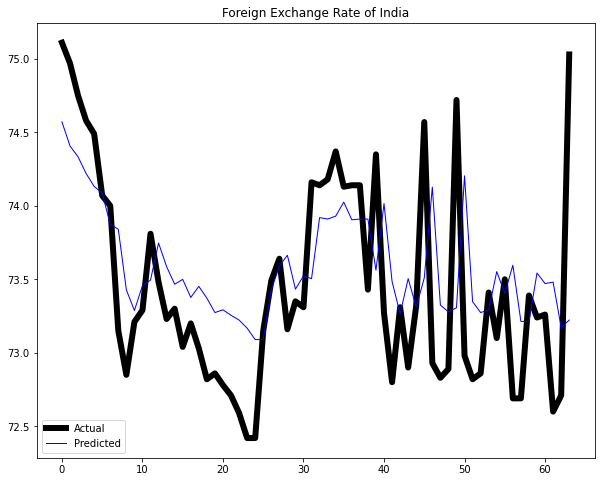

In [ ]:
### Visualizing
plt.figure(figsize=(10,8))
plt.title('Foreign Exchange Rate of India')
plt.plot(y_test_one_year , label = 'Actual', color = 'k', linewidth=6)
plt.plot(y_pred_one_year , label = 'Predicted', color = 'b', linewidth=1)
plt.legend()

In [ ]:
## Mean Square Error
mean_squared_error(y_test_one_year, y_pred_one_year)

0.33060086

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [ ]:
rmse = sqrt(mean_squared_error(y_test_one_year,y_pred_one_year))
print(rmse)

0.5749790063425622
